
### Binary classification with diabetes dataset

In [23]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


Mount google drive and read dataset

In [5]:
data = pd.read_csv('../Datasets/pima-indians-diabetes.csv')

In [9]:
data.shape

(768, 9)

In [6]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Dataset is purely numerical

In [8]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [10]:
null_values = data.isnull().any()
print(null_values)

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


The above shows the dataset has no missing values

In [12]:
df = data.copy()

In [13]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [15]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [14]:
diab_distribution = df['Outcome'].value_counts()/len(df)
diab_distribution

Outcome
0    0.651042
1    0.348958
Name: count, dtype: float64

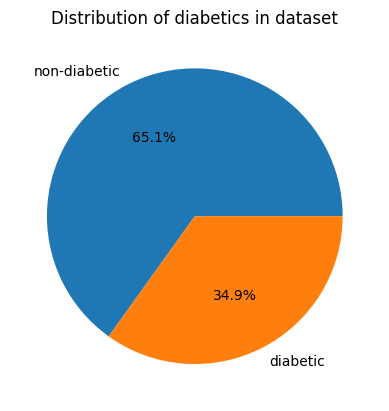

In [17]:
#Checking the percentages of Diabetic and Non-Diabetic Patients
plt.pie(diab_distribution, labels = ['non-diabetic', 'diabetic'],
       autopct = '%1.1f%%')
plt.title("Distribution of diabetics in dataset")
plt.show()


Plotting the age distribution of diabetic patients

In [18]:
neg_diab = df[df['Outcome']==0]
pos_diab = df[df['Outcome']==1]

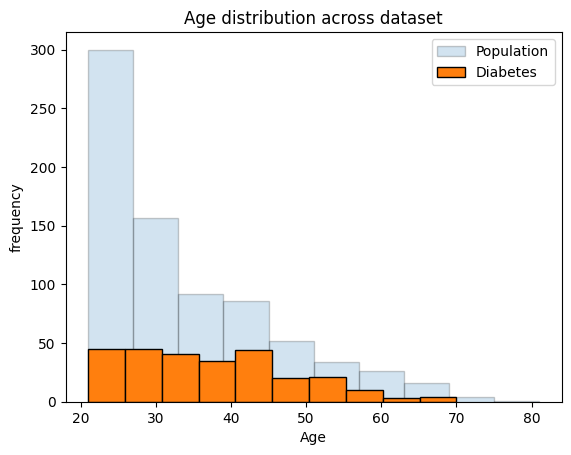

In [20]:
plt.hist(df['Age'],histtype='bar',alpha=0.2, bins=10, ec = 'black',label="Population")
plt.hist(pos_diab['Age'], histtype='bar', ec = 'black', bins=10,label="Diabetes")
plt.xlabel('Age')
plt.ylabel('frequency')
plt.title('Age distribution across dataset')
plt.legend(loc='best')

### Split data into training and testing parts

In [21]:
# Divide dataset into features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [24]:
#Scale features for better performance and convergence
scaler = StandardScaler().set_output(transform="pandas")
scaled_feat = scaler.fit_transform(X)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(scaled_feat, y, test_size=0.3, random_state=42)
#

### Define sequential model with tf keras api

Though the last dense layer has one unit, the sigmoid activation function squashes the output between 0 and 1 . Thus, a binary classification model

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model

In [33]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=40, batch_size=64, verbose=1)
history

Epoch 1/40
9/9 [==============================] - 1s 2ms/step - loss: 0.3455 - accuracy: 0.8473
Epoch 2/40
9/9 [==============================] - 0s 3ms/step - loss: 0.3424 - accuracy: 0.8492
Epoch 3/40
9/9 [==============================] - 0s 3ms/step - loss: 0.3423 - accuracy: 0.8436
Epoch 4/40
9/9 [==============================] - 0s 3ms/step - loss: 0.3411 - accuracy: 0.8436
Epoch 5/40
9/9 [==============================] - 0s 3ms/step - loss: 0.3403 - accuracy: 0.8436
Epoch 6/40
9/9 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.8473
Epoch 7/40
9/9 [==============================] - 0s 4ms/step - loss: 0.3396 - accuracy: 0.8473
Epoch 8/40
9/9 [==============================] - 0s 4ms/step - loss: 0.3390 - accuracy: 0.8436
Epoch 9/40
9/9 [==============================] - 0s 3ms/step - loss: 0.3374 - accuracy: 0.8492
Epoch 10/40
9/9 [==============================] - 0s 3ms/step - loss: 0.3379 - accuracy: 0.8492
Epoch 11/40
9/9 [======================

In [34]:
history_metrics= pd.DataFrame(history.history)
history_metrics

loss  accuracy
0   0.345530  0.847300
1   0.342433  0.849162
2   0.342268  0.843575
3   0.341134  0.843575
4   0.340287  0.843575
5   0.339969  0.847300
6   0.339606  0.847300
7   0.338983  0.843575
8   0.337432  0.849162
9   0.337921  0.849162
10  0.336445  0.849162
11  0.335982  0.849162
12  0.335238  0.851024
13  0.334187  0.849162
14  0.333816  0.851024
15  0.333707  0.851024
16  0.332849  0.849162
17  0.332254  0.851024
18  0.331526  0.851024
19  0.331147  0.851024
20  0.330715  0.851024
21  0.329249  0.852886
22  0.329414  0.851024
23  0.328782  0.856611
24  0.327809  0.854749
25  0.327560  0.854749
26  0.326767  0.858473
27  0.326425  0.854749
28  0.325304  0.860335
29  0.325002  0.858473
30  0.324222  0.860335
31  0.324217  0.860335
32  0.323775  0.856611
33  0.323198  0.854749
34  0.322507  0.852886
35  0.321880  0.856611
36  0.321675  0.858473
37  0.321164  0.860335
38  0.319897  0.860335
39  0.320273  0.862197

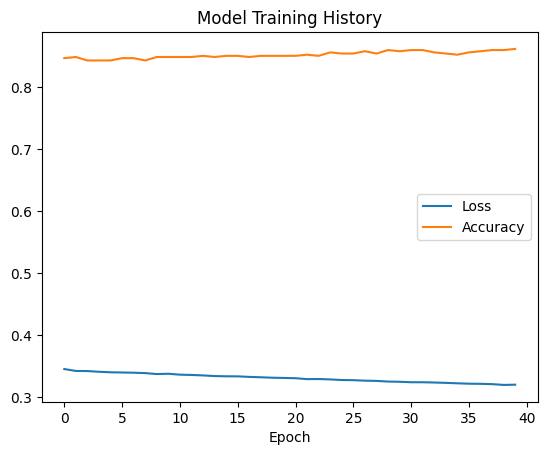

In [35]:
# Plot training history
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'])
plt.show()

In [38]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

8/8 [==============================] - 0s 2ms/step - loss: 0.5941 - accuracy: 0.7316
Test Loss: 0.5941
Test Accuracy: 0.7316


Lets do some predictions on test data

In [41]:
test_predictions = model.predict(X_test)

y_pred_probs = np.hstack((1 - test_predictions, test_predictions))

binary_pred = np.where(test_predictions > 0.5, 1, 0)

test_predictions

8/8 [==============================] - 0s 2ms/step


array([[1.39890745e-01],
       [1.04574017e-01],
       [5.67601770e-02],
       [2.08113134e-01],
       [3.06649387e-01],
       [1.52644157e-01],
       [1.83060693e-04],
       [5.29726207e-01],
       [7.53386974e-01],
       [6.68940127e-01],
       [1.32136106e-01],
       [8.07642698e-01],
       [1.72037497e-01],
       [2.50826687e-01],
       [3.13757993e-02],
       [3.75765085e-01],
       [1.31731197e-01],
       [4.04294431e-02],
       [9.69901443e-01],
       [7.30475903e-01],
       [2.35950664e-01],
       [5.22911660e-02],
       [2.67846465e-01],
       [1.15597071e-02],
       [5.68069756e-01],
       [7.59968936e-01],
       [1.07705928e-01],
       [3.28792492e-03],
       [3.48097719e-02],
       [9.52770784e-02],
       [9.77518916e-01],
       [7.88292468e-01],
       [8.65978837e-01],
       [9.73897398e-01],
       [5.26157260e-01],
       [8.47353697e-01],
       [9.38361943e-01],
       [3.77362430e-01],
       [1.00901790e-01],
       [9.92159009e-01],


Text(0.5, 1.0, 'Training accuracy vs prediction accuracy')

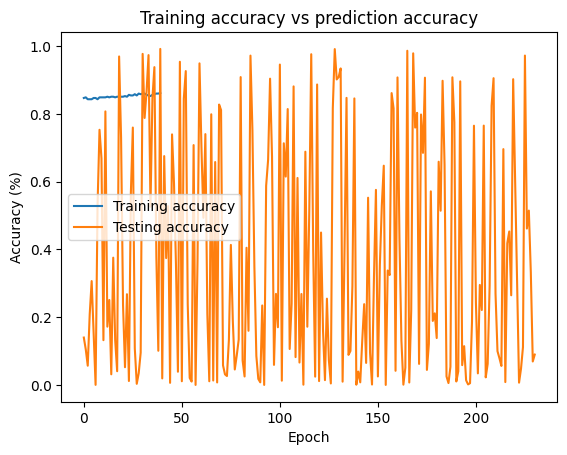

In [42]:
#Plot training and testing accuracies

plt.plot( history.history['accuracy'], label = "Training accuracy")
plt.plot( test_predictions, label = "Testing accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Training accuracy vs prediction accuracy")

### Confusion matrix and other metrics









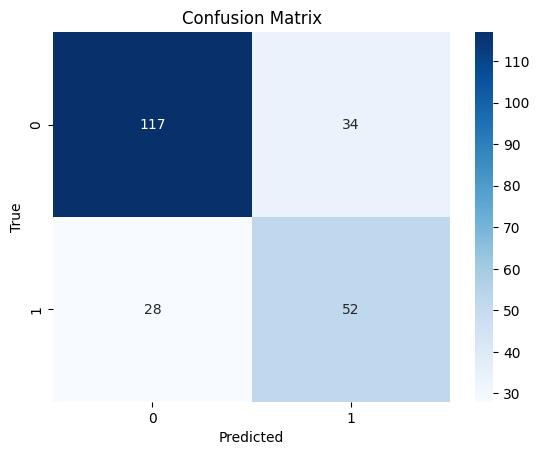

In [43]:
# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, binary_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [44]:
#Classification report
print(classification_report(binary_pred, y_test))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       145
           1       0.65      0.60      0.63        86

    accuracy                           0.73       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.73      0.73      0.73       231



### Explaining model behaviour with LIME.
 LIME helps us gain transparency into the model, therefore makiing it interpritable and not like a black box. LIME does a good work of  highlighting the most influential features and provides an explanation for why the model arrived at its conclusion. This can have tremendous benefits in disease prediction where doctors and patients are able to know which factors are influeing the AI's predictions for appropriate action.


In [45]:
from lime.lime_tabular import LimeTabularExplainer


In [46]:
# Assign target class names
class_names = [ 'No diabetes','Has diabetes']

# Get the feature names
feature_names = list(X_train.columns)

# Fit the Explainer on the training data set using the LimeTabularExplainer
explainer = LimeTabularExplainer(X_train.values, feature_names =
                                 feature_names,
                                 class_names = class_names,
                                 mode = 'classification')

# Explain prediction on test data instance
def explain_model_behav(row):
  explain_instance = explainer.explain_instance(row,lambda x: np.hstack((1 - model.predict(x), model.predict(x))),num_features=len(feature_names))
  explain_instance.show_in_notebook()

explain_model_behav(X_test.iloc[4])


/Users/macbook/anaconda3/envs/opencv-env/lib/python3.11/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/macbook/anaconda3/envs/opencv-env/lib/python3.11/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/macbook/anaconda3/envs/opencv-env/lib/python3.11/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treate

157/157 [==============================] - 0s 2ms/step


/Users/macbook/anaconda3/envs/opencv-env/lib/python3.11/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/macbook/anaconda3/envs/opencv-env/lib/python3.11/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/macbook/anaconda3/envs/opencv-env/lib/python3.11/site-packages/lime/lime_tabular.py:427: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treate

In [47]:
explain_model_behav(X_test.iloc[2])


 25/157 [===>..........................] - ETA: 0s

/Users/macbook/anaconda3/envs/opencv-env/lib/python3.11/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/macbook/anaconda3/envs/opencv-env/lib/python3.11/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/macbook/anaconda3/envs/opencv-env/lib/python3.11/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treate

157/157 [==============================] - 0s 2ms/step


/Users/macbook/anaconda3/envs/opencv-env/lib/python3.11/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/macbook/anaconda3/envs/opencv-env/lib/python3.11/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Users/macbook/anaconda3/envs/opencv-env/lib/python3.11/site-packages/lime/lime_tabular.py:427: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treate

### Task 3. Increase model performance and speed with hyperparameter tuning